## Capesize vessels - Fleet

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
vessels = pd.read_excel(r'C:\Users\Vasiliki\Desktop\Capesize Data 2022.xlsx')
vessels.head()

,LR/IMO Ship No,Vessel Name,Year Built,Month Built,Dwt,Owner,Status,Shipbuilder,Country of Build,Year Order placed,Month Order placed,Owner Country,Standard_Design
0,9738571,MINERAL YANGFAN,2019,10,206392,CMB NV,Active,Qingdao Yangfan Shipbuilding,China,2013,12,Belgium,Yangfan 206BC
1,9624251,EL GRASSO,2012,7,181365,Ebe NV,Active,Imabari Shbldg - Saijo,Japan,2010,1,Belgium,Imabari 181
2,9567025,MINERAL HOPE,2012,6,175591,CMB NV,Active,Jinhai Heavy Industry Co Ltd,China,2006,11,Belgium,DOLPHIN 176
3,9575668,MINERAL FAITH,2012,6,175620,CMB NV,Active,Jinhai Heavy Industry Co Ltd,China,2006,11,Belgium,DOLPHIN 176
4,9586813,LOWLANDS PROSPERITY,2012,1,179895,Cobelfret NV,Active,HHIC-Phil Inc,Philippines,2010,3,Belgium,Hanjin 180BC


In [4]:
vessels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   LR/IMO Ship No      1910 non-null   int64 
 1   Vessel Name         1910 non-null   object
 2   Year Built          1910 non-null   int64 
 3   Month Built         1910 non-null   int64 
 4   Dwt                 1910 non-null   int64 
 5   Owner               1910 non-null   object
 6   Status              1910 non-null   object
 7   Shipbuilder         1910 non-null   object
 8   Country of Build    1910 non-null   object
 9   Year Order placed   1910 non-null   int64 
 10  Month Order placed  1910 non-null   int64 
 11  Owner Country       1871 non-null   object
 12  Standard_Design     1754 non-null   object
dtypes: int64(6), object(7)
memory usage: 194.1+ KB


In [5]:
vessels.isnull().sum()

LR/IMO Ship No          0
Vessel Name             0
Year Built              0
Month Built             0
Dwt                     0
Owner                   0
Status                  0
Shipbuilder             0
Country of Build        0
Year Order placed       0
Month Order placed      0
Owner Country          39
Standard_Design       156
dtype: int64

## Statistic Analysis

In [6]:
vessels.describe(include='all')

,LR/IMO Ship No,Vessel Name,Year Built,Month Built,Dwt,Owner,Status,Shipbuilder,Country of Build,Year Order placed,Month Order placed,Owner Country,Standard_Design
count,1.910000e+03,1910,1910.000000,1910.000000,1910.000000,1910,1910,1910,1910,1910.000000,1910.000000,1871,1754
unique,NaN,1902,NaN,NaN,NaN,326,2,74,7,NaN,NaN,34,96
top,NaN,QINGDAO BEIHAI,NaN,NaN,NaN,Unknown,Active,Shanghai Waigaoqiao Shbldg,China,NaN,NaN,Japan,Imabari 181
freq,NaN,5,NaN,NaN,NaN,86,1776,264,869,NaN,NaN,360,118
mean,9.596489e+06,NaN,2012.990576,6.036126,203410.347120,NaN,NaN,NaN,NaN,2009.881152,6.145550,NaN,NaN
std,2.025817e+05,NaN,5.504693,3.481938,51031.814174,NaN,NaN,NaN,NaN,5.469570,4.057828,NaN,NaN
min,9.122590e+06,NaN,1996.000000,1.000000,120000.000000,NaN,NaN,NaN,NaN,1995.000000,0.000000,NaN,NaN
25%,9.446184e+06,NaN,2010.000000,3.000000,178978.000000,NaN,NaN,NaN,NaN,2006.000000,3.000000,NaN,NaN
50%,9.582544e+06,NaN,2012.000000,6.000000,181366.000000,NaN,NaN,NaN,NaN,2009.000000,6.000000,NaN,NaN
75%,9.750830e+06,NaN,2017.000000,9.000000,208396.000000,NaN,NaN,NaN,NaN,2014.000000,10.000000,NaN,NaN


From the table above someone can extract a lot and useful information. 

However, I will point out the most valuable. 

Making quick conclusions for further exploration:

1. The total records are 1910 but the number of unique owners are 326,
2. The same applies with shipbuilders with unique number 74,
3. Country of build & Owner country 7 and 34 respectively,
4. Standard design has 96 unique records,
5. The majority of the ships are active,
6. China stands on very top with 869 times to appear in the list,
7. The vessels' capacity is between 120000 and 403880. Taking a better look we can notice that the average number is 203410, but the median is 181366. This means that there are some outliers in the higher levels with them majority of the records are in the lower ones.


### Month Order placed

In [8]:
ordered = vessels['Month Order placed'].value_counts().reset_index()
ordered.columns = ['Month', 'Count']
ordered

,Month,Count
0,1,288
1,12,251
2,11,211
3,6,184
4,3,160
5,5,138
6,4,122
7,0,115
8,8,103
9,7,96


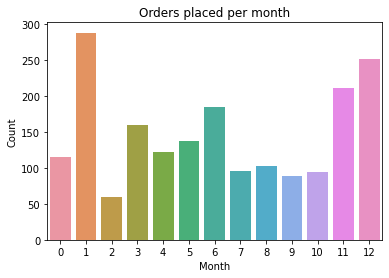

In [9]:
sns.barplot(x="Month", y="Count", data=ordered)
plt.title('Orders placed per month')
plt.savefig("Orders placed per month.jpg")
plt.show()

Orders placed commonly in January or in the end of the year (November - December).
There is no 0 month, so we have 115 cases with no month of order placed. February doesn't been preferred placing an order, with only 59 ships being on the list to be constructed.

### Month Built

In [6]:
built = vessels['Month Built'].value_counts().reset_index()
built.columns = ['Month', 'Count']
built

,Month,Count
0,1,261
1,6,200
2,9,189
3,3,180
4,7,161
5,11,149
6,4,141
7,10,140
8,2,139
9,5,135


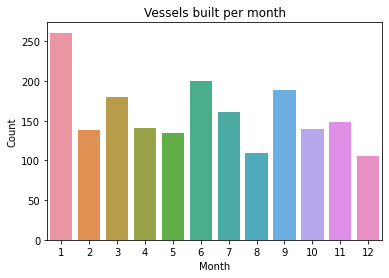

In [7]:
sns.barplot(x="Month", y="Count", data=built)
plt.title('Vessels built per month')
plt.savefig('Vessels built per month.jpg')
plt.show()

January stands on top of this list with 261 vessels built at this month. June, September and March follow along.

### Year Order placed

In [4]:
vessels['Year Order placed'].value_counts().head()

2007    246
2006    194
2013    178
2010    168
2004    157
Name: Year Order placed, dtype: int64

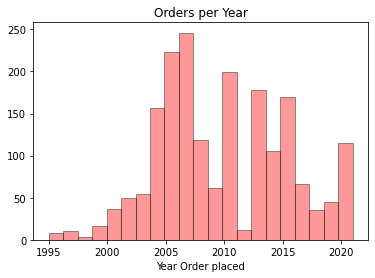

In [5]:
sns.distplot(vessels['Year Order placed'], hist=True, kde=False, norm_hist=False,
color = 'red', hist_kws={'edgecolor':'black'})
plt.title('Orders per Year')
plt.savefig('Orders per Year.jpg')
plt.show()

In 2006 & 2007 the orderbook had the highest number of orders with a total of 440 vessels. The next three years showed an inclination, but in 2010 & 2013 there was a recovery.

### Year Built

In [136]:
vessels['Year Built'].value_counts().head()

2011    216
2010    197
2012    180
2020    107
2009    106
Name: Year Built, dtype: int64

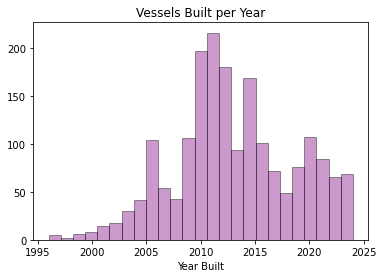

In [11]:
sns.distplot(vessels['Year Built'], hist=True, kde=False, norm_hist=False,
color = 'purple', hist_kws={'edgecolor':'black'})
plt.title('Vessels Built per Year')
plt.savefig('Vessels Built per Year.jpg')
plt.show()

From 2009 until 2012 were the years with the top amount of constructed dry bulk carriers. 2020 stands tall with 107 ships built then, after 8 years of decrease in shipbuilding.

### Construction Years

In [137]:
vessels['Contruction Years'] = vessels['Year Built'] - vessels['Year Order placed']

In [147]:
vessels['Contruction Years'].value_counts()

3    521
2    516
4    336
5    202
1    193
6    108
7     19
0     13
8      2
Name: Contruction Years, dtype: int64

In [146]:
vessels['Contruction Years'].mean()

3.1094240837696336

In [138]:
vessels.nlargest(10, 'Dwt')[['Contruction Years', 'Dwt']].set_index('Contruction Years')

,Dwt
Contruction Years,
3,403880
4,403844
2,403818
3,403811
4,403784
3,403727
3,403627
7,403508
2,402387


In [142]:
vessels.nsmallest(10, 'Dwt')[['Contruction Years', 'Dwt']].set_index('Contruction Years').sort_values(by='Dwt', ascending=False)

,Dwt
Contruction Years,
6,120397
6,120000
3,120000
3,120000
3,120000
1,120000
2,120000
2,120000
2,120000


The years of constructions don't have to do with the vessel's capacity.

### Standard Design

In [18]:
vessels['Standard_Design'].value_counts()

Imabari 181       118
BC 1800            84
DOLPHIN 176        80
SWS-177BC          72
Hyundai 180BC      70
                 ... 
Namura 171BC        1
Sanoyas 120         1
Mitsui 182 NEO      1
Samsung 149K        1
SamsungHI 149K      1
Name: Standard_Design, Length: 96, dtype: int64

In [11]:
vessels[vessels['Standard_Design'] == 'Imabari 181']['Country of Build']

Japan    118
Name: Country of Build, dtype: int64

The most popular design was constructed in Japan.

### Shipbuilder

In [143]:
vessels.Shipbuilder.value_counts()

Shanghai Waigaoqiao Shbldg        264
Imabari Shbldg - Saijo            124
Qingdao Beihai Shipbuilding HI    105
Namura Shipbuilding - Imari       101
New Times Shipbuilding Co Ltd      93
                                 ... 
Zhoushan Changhong Intl Shyd        1
Kawasaki HI - Sakaide - earl        1
COMEC                               1
Orient Shipyard - Gwangyang         1
Sanoyas Shipbuilding Corp           1
Name: Shipbuilder, Length: 74, dtype: int64

### Dwt

##### According to the statistics table above, using the perecentiles as a guide we can define the following function

In [19]:
def weight(weight):
    if weight >= 208396:
        return 'Big'
    elif weight >= 178978:
        return 'Average'
    else:
        return 'Small'

vessels['Dwt'].apply(weight)

0       Average
1       Average
2         Small
3         Small
4       Average
         ...   
1905    Average
1906    Average
1907    Average
1908    Average
1909    Average
Name: Dwt, Length: 1910, dtype: object

In [20]:
vessels['Rating_Dwt'] = vessels['Dwt'].apply(weight)

In [21]:
vessels.Rating_Dwt.value_counts()

Average    955
Big        478
Small      477
Name: Rating_Dwt, dtype: int64

The majority of the vessels' dwt is between 178k and 208k.

In [24]:
vessels[vessels['Rating_Dwt'] == 'Big']['Country of Build'].value_counts()

China       306
Japan       122
S. Korea     47
Taiwan        3
Name: Country of Build, dtype: int64

China and Japan are leading the way for the biggest capacity weight, for the construction of bigger vessels.

In [25]:
vessels[vessels['Rating_Dwt'] == 'Average']['Country of Build'].value_counts()

Japan          367
China          315
S. Korea       211
Philippines     40
Romania         10
Denmark          6
Taiwan           6
Name: Country of Build, dtype: int64

In [26]:
vessels[vessels['Rating_Dwt'] == 'Small']['Country of Build'].value_counts()

China          248
Japan          116
S. Korea        99
Taiwan          11
Philippines      3
Name: Country of Build, dtype: int64

In [32]:
vessels[vessels['Rating_Dwt'] == 'Big']['Year Built'].value_counts()

2020    59
2021    51
2019    43
2012    36
2018    34
2022    31
2017    30
2023    27
2013    27
2016    23
2011    23
2024    18
2014    17
2015    17
2010    15
2009    12
2008     7
2007     3
2004     2
2002     1
2006     1
1996     1
Name: Year Built, dtype: int64

In [145]:
vessels.groupby('Year Built')['Dwt'].max().sort_values(ascending=False)

Year Built
2012    403880
2013    403844
2011    403818
2016    403508
2014    400101
2015    400032
2018    399999
2020    399821
2019    399688
2007    327017
2008    326964
2009    326932
2022    325350
2021    324988
2017    300660
2010    298172
1996    268025
2004    233694
2002    233584
2006    229045
2024    211000
2023    210000
2005    206312
2003    203508
2001    174285
1999    172964
2000    172572
1998    151249
1997    149350
Name: Dwt, dtype: int64

In [144]:
vessels.groupby('Country of Build')['Dwt'].max().sort_values(ascending=False)

Country of Build
S. Korea       403880
China          403784
Japan          399821
Taiwan         208480
Philippines    205616
Denmark        182060
Romania        179827
Name: Dwt, dtype: int64

### Country of Build

In [76]:
vessels['Country of Build'].value_counts()

China          869
Japan          605
S. Korea       357
Philippines     43
Taiwan          20
Romania         10
Denmark          6
Name: Country of Build, dtype: int64

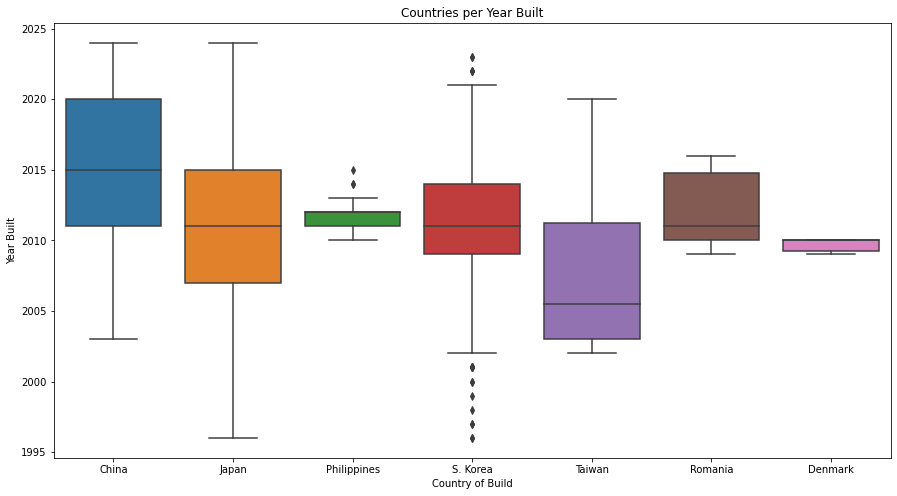

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Country of Build', y='Year Built', data=vessels)
plt.title('Countries per Year Built')
plt.savefig('Countries per Year Built.jpg')
plt.show()

In China was build the highest number of capesize vessels. Asia showing the way of shipbuilding with Europe joins the table with 2 countries at the bottom. They can't compare with the huge numbers of the top.

#### China

In [8]:
china = vessels[vessels['Country of Build'] == 'China']
china.head()

,LR/IMO Ship No,Vessel Name,Year Built,Month Built,Dwt,Owner,Status,Shipbuilder,Country of Build,Year Order placed,Month Order placed,Owner Country,Standard_Design
0,9738571,MINERAL YANGFAN,2019,10,206392,CMB NV,Active,Qingdao Yangfan Shipbuilding,China,2013,12,Belgium,Yangfan 206BC
2,9567025,MINERAL HOPE,2012,6,175591,CMB NV,Active,Jinhai Heavy Industry Co Ltd,China,2006,11,Belgium,DOLPHIN 176
3,9575668,MINERAL FAITH,2012,6,175620,CMB NV,Active,Jinhai Heavy Industry Co Ltd,China,2006,11,Belgium,DOLPHIN 176
7,9435076,MINERAL GENT,2011,4,175181,Iyo Nassen Co Ltd,Active,New Times Shipbuilding Co Ltd,China,2007,3,Japan,DOLPHIN 176
8,9435064,MINERAL BRUGGE,2011,2,175155,ETCM Holdings LLC,Active,New Times Shipbuilding Co Ltd,China,2006,12,Cayman Islands,DOLPHIN 176


In [12]:
china.describe(include='all')

,LR/IMO Ship No,Vessel Name,Year Built,Month Built,Dwt,Owner,Status,Shipbuilder,Country of Build,Year Order placed,Month Order placed,Owner Country,Standard_Design
count,8.690000e+02,869,869.000000,869.000000,869.000000,869,869,869,869,869.000000,869.000000,857,757
unique,NaN,865,NaN,NaN,NaN,164,2,35,1,NaN,NaN,27,33
top,NaN,QINGDAO BEIHAI,NaN,NaN,NaN,China Merchants Energy Shpg,Active,Shanghai Waigaoqiao Shbldg,China,NaN,NaN,China,BC 1800
freq,NaN,5,NaN,NaN,NaN,41,775,264,869,NaN,NaN,251,84
mean,9.667959e+06,NaN,2015.063291,6.101266,211896.980437,NaN,NaN,NaN,NaN,2011.724971,7.029919,NaN,NaN
std,1.876901e+05,NaN,5.002479,3.485171,59906.910566,NaN,NaN,NaN,NaN,5.233408,3.904568,NaN,NaN
min,9.255000e+06,NaN,2003.000000,1.000000,120000.000000,NaN,NaN,NaN,NaN,2001.000000,0.000000,NaN,NaN
25%,9.493626e+06,NaN,2011.000000,3.000000,177974.000000,NaN,NaN,NaN,NaN,2007.000000,4.000000,NaN,NaN
50%,9.695092e+06,NaN,2015.000000,6.000000,203149.000000,NaN,NaN,NaN,NaN,2013.000000,7.000000,NaN,NaN
75%,9.847619e+06,NaN,2020.000000,9.000000,210000.000000,NaN,NaN,NaN,NaN,2015.000000,11.000000,NaN,NaN


- The dead weight was ranged between 120000 and 403784 tonnages.

- Only two vessels are inactive.

- The year of built is from 2003 to 2024, with an average at 2015.

- The top design is BC 1800.

- The top owner is China Merchants Energy Shpg with 41 vessels.

- The top shipbuilder in the country is Shanghai Waigaoqiao Shbldg with 264 out of 869 ships have been constructed there.

In [148]:
china['Owner Country'].value_counts().head()

China        251
Greece       139
Bermuda       83
Hong Kong     55
S. Korea      55
Name: Owner Country, dtype: int64

In [149]:
china['Year Order placed'].value_counts().head()

2006    134
2015    100
2007     92
2013     90
2014     64
Name: Year Order placed, dtype: int64

<AxesSubplot:xlabel='Year Built'>

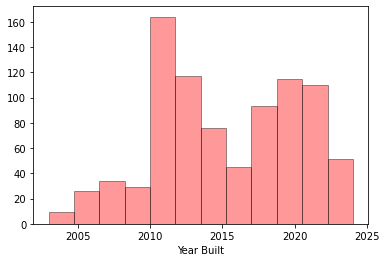

In [127]:
sns.distplot(china['Year Built'], hist=True, kde=False, norm_hist=False,
color = 'red', hist_kws={'edgecolor':'black'})

In [129]:
china.Shipbuilder.value_counts().head(10)

Shanghai Waigaoqiao Shbldg        264
Qingdao Beihai Shipbuilding HI    105
New Times Shipbuilding Co Ltd      93
Dalian Shipbuilding Ind - No 2     50
Jinhai Heavy Industry Co Ltd       41
Bohai Shipbuilding Heavy Ind       40
Nantong COSCO KHI Ship Eng         37
COSCO Shipping HI Yangzhou         31
Shanghai Jiangnan Changxing SB     28
Jiangsu Rongsheng Shipbuilding     27
Name: Shipbuilder, dtype: int64

In [174]:
china.groupby('Year Built')['Owner'].value_counts().sort_values(ascending=False).head(10)

Year Built  Owner                        
2018        China Merchants Energy Shpg      15
2021        COSCO Shipping Financial Co      15
2022          Unknown                        11
2014        Golden Ocean Group Ltd            8
2016        Oldendorff Carriers GmbH & Co     7
2020        Bank of Communications            7
2021        Bank of Communications            7
            ICBC Financial Leasing Co Ltd     7
2023        Himalaya Shipping Ltd             6
2012        China Merchants Energy Shpg       6
Name: Owner, dtype: int64

### Owner Country

In [8]:
vessels['Owner Country'].value_counts().head(10)

Japan        360
Greece       358
China        298
S. Korea     157
Bermuda      134
Singapore    101
Hong Kong     80
Taiwan        78
U. S. A.      61
Monaco        56
Name: Owner Country, dtype: int64

The battle between the countries that own the highest number of vessels is between Japan and Greece with 360 and 358 capesize tankers respectively. China follows along with 298 and finally S.Korea takes the fourth place with 157 vessels.

#### Japan

In [168]:
vessels[vessels['Owner Country'] == 'Japan']['Year Built'].value_counts().head()

2012    56
2011    49
2013    35
2010    33
2020    26
Name: Year Built, dtype: int64

In [162]:
vessels[vessels['Owner Country'] == 'Japan']['Owner'].value_counts().head(10)

Mitsui OSK Lines Ltd          36
Kawasaki Kisen Kaisha Ltd     27
NS United Kaiun Kaisha Ltd    25
Nissen Kaiun Co Ltd           22
NYK Line                      20
Mizuho Sangyo Co Ltd          20
Shoei Kisen KK                19
Seno Kisen KK                 11
Santoku Senpaku Co Ltd        10
Shunzan Kaiun KK              10
Name: Owner, dtype: int64

In [159]:
owner_year = vessels[vessels['Owner Country'] == 'Japan'][['Owner', 'Year Built']].value_counts().reset_index()
owner_year = owner_year.rename(columns={0: "Count"})
owner_year.head(10)

,Owner,Year Built,Count
0,Nissen Kaiun Co Ltd,2020,8
1,NYK Line,2012,6
2,Kawasaki Kisen Kaisha Ltd,2011,6
3,Mitsui OSK Lines Ltd,2014,5
4,Seno Kisen KK,2012,5
5,NS United Kaiun Kaisha Ltd,2013,5
6,Mitsui OSK Lines Ltd,2013,5
7,Kawasaki Kisen Kaisha Ltd,2012,5
8,Mitsui OSK Lines Ltd,2012,4
9,Kawasaki Kisen Kaisha Ltd,2010,4


<AxesSubplot:xlabel='Year Built'>

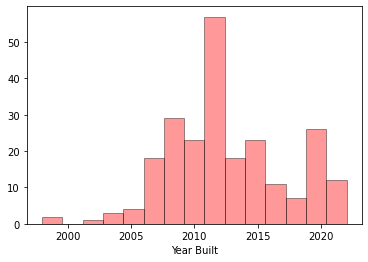

In [153]:
sns.distplot(owner_year['Year Built'], hist=True, kde=False, norm_hist=False,
color = 'red', hist_kws={'edgecolor':'black'})
